In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sb
import time

In [2]:
raw_data = pd.read_csv('tracks.csv', skipinitialspace=True)

In [3]:
spotifyAPI = pd.read_csv('LDS Data 2025-2026/DataPostSpotifyAPI.csv')

In [4]:
df_cleaned = raw_data.copy()

# Overview

In [5]:
raw_data

,id,id_artist,title,featured_artists,primary_artist,language,album,swear_IT,swear_EN,swear_IT_words,...,album_release_date,album_type,disc_number,track_number,duration_ms,explicit,popularity,id_album,lyrics,streams@1month
0,TR934808,ART04205421,​polka 2 :-/,"Ernia, Guè",Rosa Chemical,pl,FOREVER AND EVER,13,6,"['cazzo', 'cesso', 'coglioni', 'figa', 'merda'...",...,2021-04-09,album,1.0,3.0,207761.0,True,46.0,ALB115557,"Oplà, ah\nBdope, chiama due b—\n\nMi candidere...",186522.0
1,TR760029,ART04205421,POLKA,Thelonious B.,Rosa Chemical,en,FOREVER AND EVER,9,12,"['cazzo', 'culo', 'frocio', 'puttana', 'sega',...",...,2021-04-09,album,1.0,3.0,207761.0,True,46.0,ALB115557,"Greg Willen, non dormire\n(Brr-poh)\n\nT-T-Tro...",194313.0
2,TR916821,ART04205421,​britney ;-),"MamboLosco, RADICAL",Rosa Chemical,en,FOREVER AND EVER,16,12,"['bastardo', 'cazzo', 'culo', 'merda', 'troia']",...,2021-04-09,album,1.0,1.0,193544.0,True,39.0,ALB115557,"Mothz\nYeah, yeah, yeah-yeah\nBdope, chiama du...",63750.0
3,TR480968,ART04205421,CEO,Taxi B,Rosa Chemical,it,OKAY OKAY !! - EP,8,3,"['cazzo', 'culo', 'fottere', 'merda', 'pompino...",...,2025-05-16,single,1.0,2.0,169000.0,True,47.0,ALB730959,Designer sui vestiti penso di essere un outlet...,41473.0
4,TR585039,ART04205421,LONDRA,Rkomi,Rosa Chemical,en,FOREVER AND EVER,1,0,['cazzo'],...,2020-05-28,album,1.0,8.0,194779.0,True,41.0,ALB436151,"Bdope (Yeah)\n\nVuole solo me, non fare la gel...",30553.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11161,TR434449,ART02733420,Badabum Cha Cha - Gabri Ponte & Paki Rmx (Radi...,NaN,Marracash,it,Badabum Cha Cha (The Remixes),0,0,[],...,2016-07-01,single,1.0,1.0,234374.0,False,57.0,ALB248347,"Qui non va, ma questo badabum cha cha\nTira fo...",4663.0
11162,TR826351,ART02733420,Senza Un Posto Nel Mondo - Alternative Version,Tiziano Ferro,Marracash,it,Senza Un Posto Nel Mondo – Single,1,0,['fortuna'],...,2015-02-10,album,1.0,20.0,248330.0,True,24.0,ALB100713,Odio questa città (città)\nSappiamo che la ver...,5686.0
11163,TR529809,ART02733420,Badabum Cha Cha - Gabri Ponte & Paki Rmx (Exte...,NaN,Marracash,it,Badabum Cha Cha (The Remixes),0,0,[],...,2016-07-01,single,1.0,1.0,234374.0,False,57.0,ALB248347,"Qui non va, ma questo badabum cha cha\nTira fo...",5540.0
11164,TR280904,ART02733420,Tempo,NaN,Marracash,it,NaN,0,1,[],...,2015-02-10,album,1.0,7.0,302173.0,True,37.0,ALB100713,É crudo il suono e questa vibra che ti do\nCru...,4672.0


In [6]:
raw_data.disc_number.value_counts()

disc_number
1.0    10915
2.0      164
3.0        7
5.0        1
4.0        1
Name: count, dtype: int64

In [7]:
raw_data.album_type.value_counts()

album_type
album          9353
single         1544
compilation     191
Name: count, dtype: int64

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11166 entries, 0 to 11165
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    11166 non-null  object 
 1   id_artist             11166 non-null  object 
 2   title                 11166 non-null  object 
 3   featured_artists      3517 non-null   object 
 4   primary_artist        11166 non-null  object 
 5   language              11061 non-null  object 
 6   album                 9652 non-null   object 
 7   swear_IT              11166 non-null  int64  
 8   swear_EN              11166 non-null  int64  
 9   swear_IT_words        11166 non-null  object 
 10  swear_EN_words        11166 non-null  object 
 11  year                  10722 non-null  float64
 12  month                 9969 non-null   float64
 13  day                   9843 non-null   float64
 14  n_sentences           11090 non-null  float64
 15  n_tokens           

In [20]:
spotifyAPI

,id,id_artist,title,featured_artists,primary_artist,language,album,swear_IT,swear_EN,swear_IT_words,...,album_release_date,album_type,disc_number,track_number,duration_ms,explicit,popularity,id_album,lyrics,streams@1month
0,TR934808,ART04205421,​polka 2 :-/,"Ernia, Guè",Rosa Chemical,pl,FOREVER AND EVER,13,6,"['cazzo', 'cesso', 'coglioni', 'figa', 'merda'...",...,2021-04-09,album,1.0,3.0,207761.0,True,46.0,ALB115557,"Oplà, ah\nBdope, chiama due b—\n\nMi candidere...",186522.0
1,TR760029,ART04205421,POLKA,Thelonious B.,Rosa Chemical,en,FOREVER AND EVER,9,12,"['cazzo', 'culo', 'frocio', 'puttana', 'sega',...",...,2021-04-09,album,1.0,3.0,207761.0,True,46.0,ALB115557,"Greg Willen, non dormire\n(Brr-poh)\n\nT-T-Tro...",194313.0
2,TR916821,ART04205421,​britney ;-),"MamboLosco, RADICAL",Rosa Chemical,en,FOREVER AND EVER,16,12,"['bastardo', 'cazzo', 'culo', 'merda', 'troia']",...,2021-04-09,album,1.0,1.0,193544.0,True,39.0,ALB115557,"Mothz\nYeah, yeah, yeah-yeah\nBdope, chiama du...",63750.0
3,TR480968,ART04205421,CEO,Taxi B,Rosa Chemical,it,OKAY OKAY !! - EP,8,3,"['cazzo', 'culo', 'fottere', 'merda', 'pompino...",...,2025-05-16,single,1.0,2.0,169000.0,True,47.0,ALB730959,Designer sui vestiti penso di essere un outlet...,41473.0
4,TR585039,ART04205421,LONDRA,Rkomi,Rosa Chemical,en,FOREVER AND EVER,1,0,['cazzo'],...,2020-05-28,album,1.0,8.0,194779.0,True,41.0,ALB436151,"Bdope (Yeah)\n\nVuole solo me, non fare la gel...",30553.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11158,TR434449,ART02733420,Badabum Cha Cha - Gabri Ponte & Paki Rmx (Radi...,NaN,Marracash,it,Badabum Cha Cha (The Remixes),0,0,[],...,2016-07-01,single,1.0,1.0,234374.0,False,57.0,ALB248347,"Qui non va, ma questo badabum cha cha\nTira fo...",4663.0
11159,TR826351,ART02733420,Senza Un Posto Nel Mondo - Alternative Version,Tiziano Ferro,Marracash,it,Senza Un Posto Nel Mondo – Single,1,0,['fortuna'],...,2015-02-10,album,1.0,20.0,248330.0,True,24.0,ALB100713,Odio questa città (città)\nSappiamo che la ver...,5686.0
11160,TR529809,ART02733420,Badabum Cha Cha - Gabri Ponte & Paki Rmx (Exte...,NaN,Marracash,it,Badabum Cha Cha (The Remixes),0,0,[],...,2016-07-01,single,1.0,1.0,234374.0,False,57.0,ALB248347,"Qui non va, ma questo badabum cha cha\nTira fo...",5540.0
11161,TR280904,ART02733420,Tempo,NaN,Marracash,it,NaN,0,1,[],...,2015-02-10,album,1.0,7.0,302173.0,True,37.0,ALB100713,É crudo il suono e questa vibra che ti do\nCru...,4672.0


#### Lyrics-based Profiling:
- n_sentences
- n_tokens
- char_per_tok
- avg_token_per_clause
- swear_IT, swear_EN
- swear_IT_words, swear_EN_words
- lyrics

#### Audio-based Profilling:
- bpm
- rolloff
- flux
- rms
- flatness
- spectral_complexity
- pitch
- loudness

#### Audio Feature Engineering
1. Tempo class
slow (<90 BPM)
medium (90–130 BPM)
fast (>130 BPM)

2. Energy score
Combine rms, loudness, and flux.

3. Brightness score
From rolloff + flatness.

4. Danceability proxy
Higher bpm + lower spectral flatness + high RMS.

1. “Energetic Dance Songs”
- High BPM
- High rolloff
- High loudness
- Bright timbre

2. “Dark Trap / Urban Rap”
- High profanity
- Heavy bass (high RMS)
- Low pitch
- Dark spectral features

3. “Slow Emotional Ballads”
- Low BPM
- Long lyrics
- High sentiment polarity (sad/negative)

4. “Romantic Pop”
- Medium BPM
- Positive sentiment
- Clean lyrics
- Simple structure

# Statistic

In [9]:
raw_data.select_dtypes(include=['int64','bool','float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
swear_IT,11166.0,2.343006,3.704831,0.0000,0.000000,1.000000,3.000000,7.200000e+01
swear_EN,11166.0,0.711177,2.555423,0.0000,0.000000,0.000000,0.000000,7.200000e+01
year,10722.0,2015.135796,7.022598,1992.0000,2011.000000,2016.000000,2021.000000,2.025000e+03
month,9969.0,6.198515,3.482992,1.0000,3.000000,6.000000,10.000000,1.200000e+01
day,9843.0,15.808697,8.881989,1.0000,9.000000,16.000000,23.000000,3.100000e+01
n_sentences,11090.0,59.399639,24.711996,1.0000,46.000000,58.000000,73.000000,4.370000e+02
n_tokens,11090.0,496.891253,209.187612,3.0000,372.000000,491.000000,615.000000,3.089000e+03
char_per_tok,11090.0,4.054416,0.445958,2.0000,3.866946,4.012709,4.168686,1.200000e+01
avg_token_per_clause,11090.0,8.002009,14.577876,0.0000,5.859020,6.764171,8.090909,6.600000e+02
bpm,11102.0,114.134841,26.827124,59.9700,91.910000,106.975000,134.650000,7.382700e+02


In [10]:
raw_data.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
id,11166,11093,TR367132,4
id_artist,11166,104,ART91352277,353
title,11166,10521,Intro,36
featured_artists,3517,1740,Guè,64
primary_artist,11166,104,Mondo Marcio,353
language,11061,35,it,9352
album,9652,890,Rimo Da Quando,47
swear_IT_words,11166,2659,[],4176
swear_EN_words,11166,535,[],8426
album_name,11088,2421,SANTANA MONEY GANG,132


In [11]:
raw_data.describe(include="all").T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,11166,11093,TR367132,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id_artist,11166,104,ART91352277,353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,11166,10521,Intro,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
featured_artists,3517,1740,Guè,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
primary_artist,11166,104,Mondo Marcio,353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language,11061,35,it,9352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
album,9652,890,Rimo Da Quando,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
swear_IT,11166.0,NaN,NaN,NaN,2.343006,3.704831,0.0,0.0,1.0,3.0,72.0
swear_EN,11166.0,NaN,NaN,NaN,0.711177,2.555423,0.0,0.0,0.0,0.0,72.0
swear_IT_words,11166,2659,[],4176,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Handling missing value

In [12]:
def missing_values(data : pd.DataFrame, threshold : float = 10):

    na_count = data.isna().sum()
    na_exist = na_count[na_count > 0]
    na_abs_frq = na_exist.values
    na_rel_frq = round(na_exist/len(data)*100)
    missings = pd.DataFrame({'Nº of missings': na_abs_frq, '% of missings': na_rel_frq})
    missings = missings.sort_values(by = 'Nº of missings', ascending = False)

    if threshold:
        missings['Above threshold'] = [True if x > threshold else False for x in missings['% of missings']]
    
    return missings

missing_values(df_cleaned)

,Nº of missings,% of missings,Above threshold
featured_artists,7649,69.0,True
album,1514,14.0,True
day,1323,12.0,True
month,1197,11.0,True
year,444,4.0,False
language,105,1.0,False
explicit,78,1.0,False
album_type,78,1.0,False
disc_number,78,1.0,False
track_number,78,1.0,False


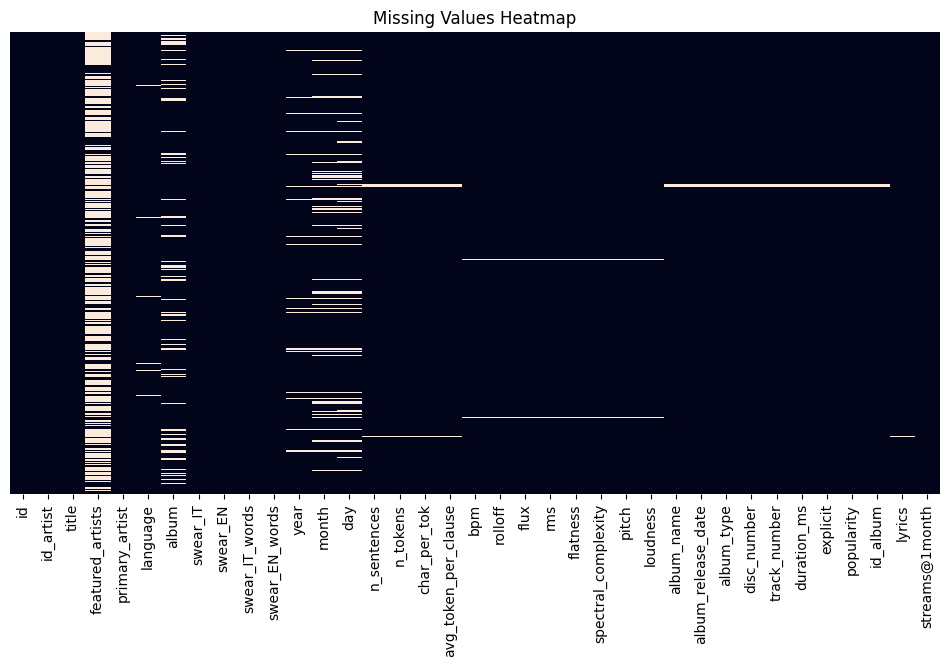

In [13]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_cleaned.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

- use spotifyAPI to fill first then computed the other
- use lyrics to fill n_sentences + n_tokens + char_per_tok + avg_token_per_clause
- lyrics to fill language (?!)

In [14]:
mask_non_empty = raw_data["album"].notna() & (raw_data["album"].astype(str).str.strip() != "")

df_album = raw_data[mask_non_empty].copy()

df_album["album_match"] = df_album["album"].str.lower().str.strip() == \
                          df_album["album_name"].str.lower().str.strip()

mismatched_rows = df_album[df_album["album_match"] == False]

print("Total non-empty album rows:", len(df_album))
print("Matching rows:", df_album["album_match"].sum())
print("Not matching rows:", len(mismatched_rows))

print("\nRows where album != album_name:")
print(mismatched_rows[["album", "album_name"]])

Total non-empty album rows: 9652
Matching rows: 4861
Not matching rows: 4791

Rows where album != album_name:
                                   album                         album_name
3                      OKAY OKAY !! - EP                        OKAY OKAY 2
4                       FOREVER AND EVER                            FOREVER
5                       FOREVER AND EVER                            FOREVER
6                       FOREVER AND EVER                            FOREVER
7                       FOREVER AND EVER                            FOREVER
...                                  ...                                ...
11158          Status (Vendetta Edition)    Status (Inediti, Rarità & Live)
11160          Status (Vendetta Edition)    Status (Inediti, Rarità & Live)
11161      Badabum Cha Cha (The Remixes)  Che Ne Sanno I 2000 (feat. Danti)
11162  Senza Un Posto Nel Mondo – Single                             Status
11163      Badabum Cha Cha (The Remixes)  Che Ne Sanno

In [32]:
# 1. define columns we want to fill
fill_columns = [
    "lyrics", "featured_artists", "album", "year", "month", "day",
    "album_type", "disc_number", "track_number",
    "id_album", "duration_ms", "explicit"
]

# 2. Remove duplicates in spotify API based on id + id_artist
spotify_clean = (
    spotifyAPI
    .sort_values(by=fill_columns, ascending=False)
    .drop_duplicates(subset=["id", "id_artist"], keep="first")
)

# 3. Build lookup dictionary
spotify_lookup = spotify_clean.set_index(["id", "id_artist"]).to_dict(orient="index")

# 4. Fill missing values in df_cleaned
filled_rows = 0

for idx, row in df_cleaned.iterrows():
    key = (row["id"], row["id_artist"])

    if key not in spotify_lookup:
        continue

    source = spotify_lookup[key]
    updated = False

    for col in fill_columns:
        val = row[col]

        is_missing = (
            (isinstance(val, float) and pd.isna(val))
            or val is None
            or val == ""
            or val == []
        )

        if is_missing and col in source and not pd.isna(source[col]):
            df_cleaned.at[idx, col] = source[col]
            updated = True

    if updated:
        filled_rows += 1

print(f"Filled missing values for {filled_rows} rows using spotifyAPI.")

Filled missing values for 0 rows using spotifyAPI.


the rows_number is increase (?!)

In [28]:
raw_data["id"].duplicated().sum(), spotifyAPI["id"].duplicated().sum()

(np.int64(73), np.int64(73))

In [29]:
dupes = raw_data[raw_data["id"].duplicated(keep=False)]
dupes.sort_values("id")

,id,id_artist,title,featured_artists,primary_artist,language,album,swear_IT,swear_EN,swear_IT_words,...,album_release_date,album_type,disc_number,track_number,duration_ms,explicit,popularity,id_album,lyrics,streams@1month
4240,TR108862,ART56320683,Sushi Bar,NaN,Bassi Maestro,en,Sushi EP,8,1,"['bastardo', 'cesso', 'culo', 'fesso', 'merda']",...,2007-11-13,single,1.0,3.0,215461.0,True,6.0,ALB697589,Questo mondo resta freddo anche se vivi da sta...,5367.0
7786,TR108862,ART07127070,SPINE,Coez,Noyz Narcos,cs,VIRUS (Deluxe),1,0,['scopare'],...,2022-01-14,album,1.0,6.0,155294.0,True,44.0,ALB525038,Sei al centro del mio cuore come 'na spina\nSe...,17849.0
3199,TR135764,ART73965015,Nessuno vale quanto te,NaN,Ghemon,it,ORCHIdee,0,0,[],...,2014-05-27,album,1.0,8.0,238773.0,False,26.0,ALB346809,Dicono che da un posto piccolo non può venire ...,6875.0
5847,TR135764,ART86549066,Giovani eroi,Not Good,Emis Killa,it,"Keta Music, Vol. 3",5,1,"['bastardo', 'cazzo', 'merda', 'troia']",...,2021-07-23,album,1.0,10.0,152733.0,True,35.0,ALB168242,"Oh, la city è silenziosa, in zona solo un clac...",14390.0
8104,TR190585,ART78209349,Nei treni la notte,Frah Quintale,Coez,it,From The Rooftop 2,0,0,[],...,2022-10-14,album,1.0,3.0,181789.0,False,43.0,ALB760031,Ho fatto un giro in questa città\nEd è come fa...,5618.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,TR980497,ART48537029,Te-le-co-man-do,NaN,Mistaman,it,Anni senza fine,7,0,"['cagare', 'cazzo', 'coglioni', 'cretini', 'fi...",...,2008-07-29,album,1.0,8.0,215373.0,True,7.0,ALB102546,"Click, okay l'ho fatto, ti ho riaccesa\nBella ...",5081.0
4190,TR987615,ART56320683,Django Muzik,Mondo Marcio,Bassi Maestro,it,Guarda In Cielo,6,0,"['cazzo', 'culo', 'merda']",...,2014-05-28,single,1.0,1.0,245394.0,True,16.0,ALB916617,Se avessi un'altra chance\nSarei molto più cin...,5524.0
1318,TR987615,ART63613967,Polo Nord,NaN,Massimo Pericolo,en,NaN,7,0,"['cazzo', 'culo', 'merda', 'puttana']",...,2019-09-27,album,1.0,12.0,249303.0,False,53.0,ALB409177,"And in my mind, in my head\nThis is where we a...",64575.0
10375,TR997536,ART91352277,Vida Loca,NaN,Mondo Marcio,co,UOMO!,1,1,['fica'],...,2019-03-08,album,1.0,5.0,181800.0,True,24.0,ALB145056,Se parto tu mi segui a ruota (Yeh-yeah)\nTropp...,5060.0


same id (track) but difference info => wrong data

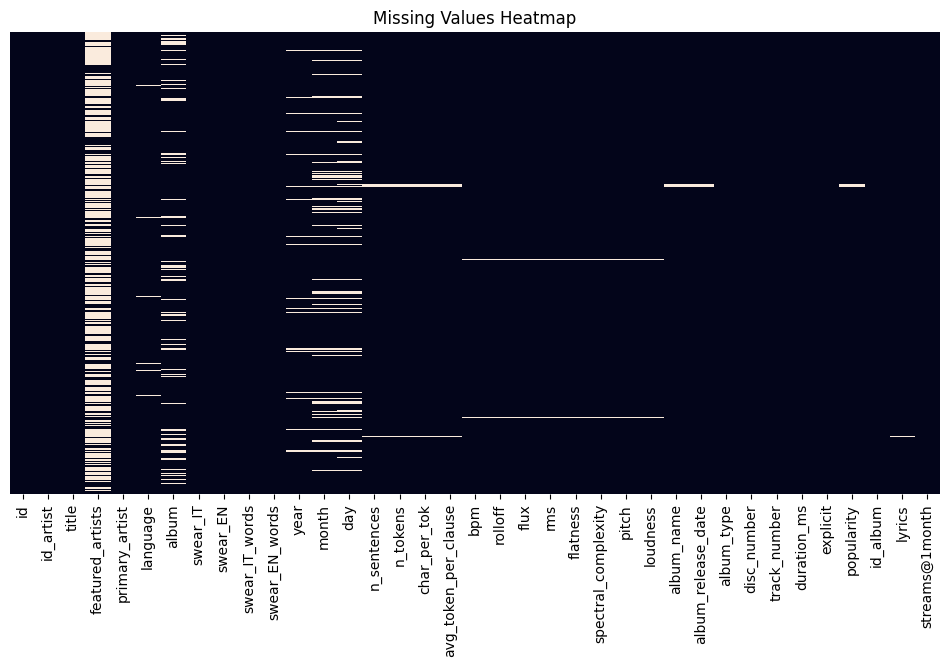

In [33]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_cleaned.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [35]:
df_cleaned[df_cleaned.lyrics.isnull()]

,id,id_artist,title,featured_artists,primary_artist,language,album,swear_IT,swear_EN,swear_IT_words,...,album_release_date,album_type,disc_number,track_number,duration_ms,explicit,popularity,id_album,lyrics,streams@1month
6950,TR105319,ART46711784,Consegnato.02,NaN,Frah Quintale,it,NaN,0,0,[],...,2021-12-12,single,1.0,1.0,155946.0,True,0.0,ALB903727,NaN,5519.0
6952,TR252811,ART46711784,Consegnato.01,NaN,Frah Quintale,it,NaN,0,0,[],...,2018-06-29,album,1.0,21.0,92125.0,False,25.0,ALB635494,NaN,4906.0
9775,TR590611,ART48622722,Introliberassociazione,NaN,Salmo,it,Sotto Pelle,0,0,[],...,2018-11-09,album,1.0,13.0,205266.0,True,60.0,ALB370362,NaN,4944.0


In [38]:
spotifyAPI[spotifyAPI.id=='TR590611']

,id,id_artist,title,featured_artists,primary_artist,language,album,swear_IT,swear_EN,swear_IT_words,...,album_release_date,album_type,disc_number,track_number,duration_ms,explicit,popularity,id_album,lyrics,streams@1month
